# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula. 

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** |Converts categories into binary variables  |
| **Feature selection*** |The process of selecting the most relevant variables to train models  |
| **Classifier** | It assigns inputs to categories instead of predicting probabilities |
| **Precision** | total number of true positives over number of all predicted positives |
| **Recall** |total number of positives over all true positives and false negatives or all acctual positves  |
| **F1 Score** |score that measueres the accuracy of a model through a ROC surve. |
| **Parsimonious model** |Models that are simple and efficient, and get the point across withoiut too many variables  |
| **Ridge regression** | A regression that shrinks unessecary variables, but no variables go to zero |
| **LASSO regression** |A regression taht shrinks nessecary variables for trianng models and has certain varibles go to 0  |
| **Cross validation** |A way of training the dataset given multiple times by splitting it to gett he optimal lamba to use on the testing dataset  |
| **Tree based methods** |A way to "cut" our dataset into multiple smaller peices to make it easier to analysze |

*Just give the general idea.

## Question 2 
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?

*A:*
a) On an ROC curve, a perfect classifier creates a perfect triangle, because it shows that the area under the curve is 1, capturing all positive cases without misclassifying one. A bad classifier on an ROC curve is one that goes from (0,0) to (1,1), showing it did not capture any positive cases, but rather the false positive cases. <br>

b) If an F1 score is close to 1, then the ROC curve accurately captures the positive cases.  Thus, the rate of getting a false negative is lower, thus showing high precision and recall.  However, an F2 score close to 0 shows that there is a higher rate of false positives than true positives, thus low precision and recall.

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** |Wider  | Longer |
| **Dependent Variable Type** |numeric  |binary  |
| **Purpose** (regression or classification) | regression |classification  |
| **Range of output variable** ($y_i$ or $p_i$) |$y_i$  |$p_i$  |
| **Method*** |using a line of best-fit through scatterplot of points  | calcualting probabilites of ebing assigned to a caterogory for each value |
| **Example of use** |Given a scatter plot of games won, what is line of best fit  | Probaility of being assigned to the red team versus the purpke team |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

*A:* It is important to train and then test our model because the model needs training data to use to accurately predict the outcomes we want.  It also prevents overfitting our model so that the model isn't accustomed to just one dataset and performs to well on that but poorly on other datasets.  We can accomplish this by splitting our dataset into training and testing data.  In doing so we trained the model on the training data, so we can compare those values to the testing dataset to see how well the model worked.

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

In [35]:
library(tidyverse)
library(dplyr)


housing <- read.csv("~/Downloads/GitHub/BIOS-512/Data/housing.csv")
housing

longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>
-122.23,37.88,41,880,322,126,8.3252,452600
-122.22,37.86,21,7099,2401,1138,8.3014,358500
-122.24,37.85,52,1467,496,177,7.2574,352100
-122.25,37.85,52,1274,558,219,5.6431,341300
-122.25,37.85,52,1627,565,259,3.8462,342200
-122.25,37.85,52,919,413,193,4.0368,269700
-122.25,37.84,52,2535,1094,514,3.6591,299200
-122.25,37.84,52,3104,1157,647,3.1200,241400
-122.26,37.84,42,2555,1206,595,2.0804,226700


#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [36]:
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}



housing_scaled <- housing %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

set.seed(123) # setting seed
train <- runif(nrow(housing_scaled)) < 0.75
test <- !train

#### c) Fit the model.

In [37]:
f = median_house_value ~ longitude +latitude + housing_median_age + total_rooms + population + households + median_income

m <- lm(f, data=housing_scaled %>% filter(train))
summary(m)


Call:
lm(formula = f, data = housing_scaled %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11495 -0.09080 -0.02335  0.06400  1.00888 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.728806   0.015356   47.46   <2e-16 ***
longitude          -0.868215   0.016894  -51.39   <2e-16 ***
latitude           -0.817586   0.015007  -54.48   <2e-16 ***
housing_median_age  0.122501   0.005194   23.59   <2e-16 ***
total_rooms        -0.065063   0.065076   -1.00    0.317    
population         -3.526248   0.092512  -38.12   <2e-16 ***
households          1.967049   0.062952   31.25   <2e-16 ***
median_income       1.143536   0.010837  105.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1425 on 15556 degrees of freedom
Multiple R-squared:  0.6399,	Adjusted R-squared:  0.6397 
F-statistic:  3948 on 7 and 15556 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

Warning message in geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1)):
“All aesthetics have length 1, but the data has 5076 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


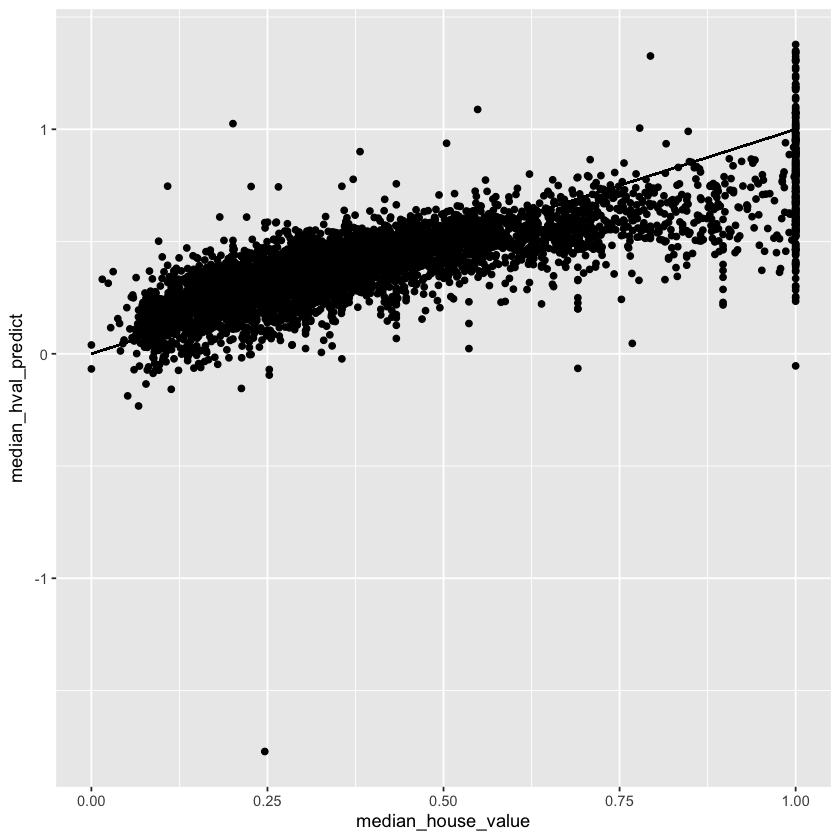

In [38]:
dx <- housing_scaled %>% filter(test)

dx <- dx %>% 
  mutate(median_hval_predict = predict(m, dx %>% as.data.frame()))

ggplot(dx, aes(median_house_value, median_hval_predict)) + geom_point() + geom_segment(aes(x=0,y=0,xend=1,yend=1))
# ending at 1 becasue out valuesa re all probabilites


#### e) Make a residuals plot.

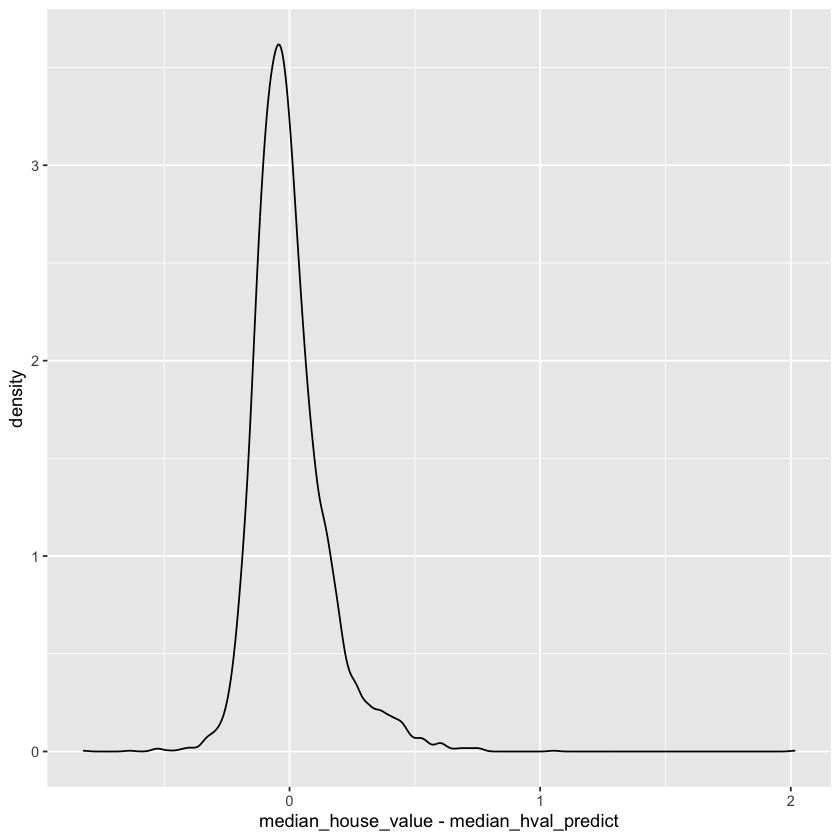

In [39]:
ggplot(dx, aes(median_house_value-median_hval_predict)) + geom_density()

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables. 
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?

*A* A logistic regression is appropriate here because the outcome is a binary variable, meaning it has only two outcomes.  Thus, conducting a logistic regression, we can more accurately predict which outcome an observation would fit into.

In [40]:
diabetes_df <- read.csv("~/Downloads/GitHub/BIOS-512/Data/diabetes.csv")
diabetes_df

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [41]:
set.seed(123)

diabetes_scaled <- diabetes_df %>% select(where(is.numeric)) %>%
                                mutate(across(where(is.numeric),scale))

set.seed(123)
n <- nrow(diabetes_scaled)
train_idx <- sample.int(n, size=floor(0.1*n))

train <- diabetes_scaled %>% slice(train_idx)
test <- diabetes_scaled %>% slice(setdiff(seq_len(n), train_idx))

#### c) Fit the model.

In [42]:
fit <- Outcome ~ .
model <- glm(fit, data=train, family = binomial())

summary(model)


Call:
glm(formula = fit, family = binomial(), data = train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -8.2848     2.3250  -3.563 0.000366 ***
Pregnancies                1.8716     1.5354   1.219 0.222848    
Glucose                    5.0362     2.1896   2.300 0.021446 *  
BloodPressure              0.2239     2.3883   0.094 0.925307    
SkinThickness              1.4403     2.3091   0.624 0.532776    
Insulin                   -1.2769     2.0595  -0.620 0.535259    
BMI                        7.2613     4.2227   1.720 0.085507 .  
DiabetesPedigreeFunction   0.7208     1.9228   0.375 0.707739    
Age                        1.0054     1.8917   0.531 0.595091    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.898  on 75  degrees of freedom
Residual deviance: 76.074  on 67  degrees of freedom
AIC: 94.074

Number of Fisher Sc

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy. 

In [43]:
prediction <- predict(model, newdata=test, type="response")

pred <- as.integer(prediction >= 0.5)
truth <- test$Outcome

tp <- sum(pred == 1 & truth == 1)
fp <- sum(pred == 1 & truth == 0)
tn <- sum(pred == 0 & truth == 0)
fn <- sum(pred == 0 & truth == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

df <- tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)

df


measure,value
<chr>,<dbl>
True Positive,147.0000000
False Positive,72.0000000
True Negative,379.0000000
False Negative,94.0000000
Accuracy,0.7601156


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

*A:* The most important are pregnancies, glucose, blood pressure, insulin, BMI, diabetes pedigree function, and age. The Lasso model affects accuracy because it allows for variables that are of least importance to be shrunk to zero, allowing for more accuracy with overfitting, and using a model.

In [44]:
library(broom)
library(gridExtra)
library(glmnet)


y <- diabetes_df$Outcome
x <- model.matrix(Outcome ~ ., diabetes_df)[, -1] 

# fitting LASOO to logistics reression
set.seed(123)
cv_lasso <- cv.glmnet(x,y,alpha=1,family=binomial())
best_fit <- glmnet(x,y,lambda=cv_lasso$lambda.min)
best_fit$beta



8 x 1 sparse Matrix of class "dgCMatrix"
                                    s0
Pregnancies               0.0197982075
Glucose                   0.0057692333
BloodPressure            -0.0019585850
SkinThickness             .           
Insulin                  -0.0001155511
BMI                       0.0126284239
DiabetesPedigreeFunction  0.1352965951
Age                       0.0023890041

#### f) Make a plot of actual vs. predicted values for the LASSO model.

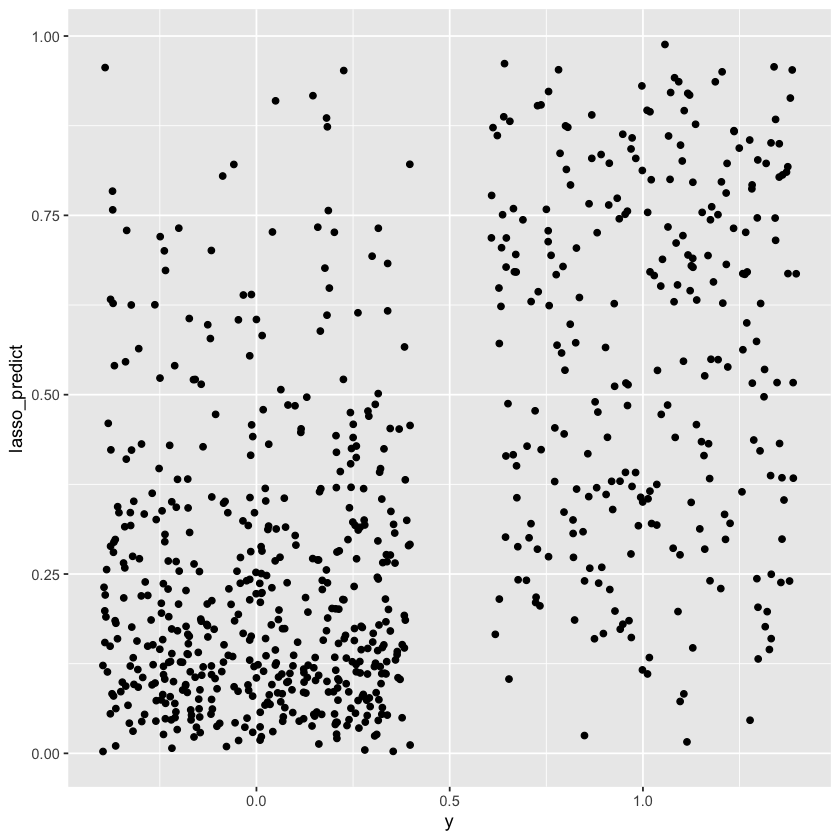

In [45]:
# getting predicted values
lasso_predict <- predict(cv_lasso, newx=x, s="lambda.min", type="response")

# creating dataframe containing prediction and acctual values
acc_pred <- data.frame(y,lasso_predict)

# creating plot

plot <- ggplot(acc_pred, aes(x=y, y=lasso_predict)) +
        geom_jitter()
plot

# I am not sure if this is complelty right, but i followed the code from the lecture, and asumed geom_jitter would giv ethe best interpretation of the data